In [1]:
import os, shutil
import numpy as np

from matplotlib import image, pyplot
from skimage.transform import resize


from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

from keras import callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, f1_score, recall_score,classification_report,roc_curve, auc 
from sklearn.utils import class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm


In [2]:
resultPath = 'C:/Users/HP/Downloads/Results/CNN'


In [3]:
DATA_PATH = "C:/Users/HP/Downloads/Image_Hunter_dataset/"
spamData=[]
label=[]
hashList=[]
count=-1
for folder in os.listdir(DATA_PATH):
    if folder=="New_Spam":
        continue;
    print(">>>Reading ",folder)
    count+=1
    for file in os.listdir(DATA_PATH+folder):
        if(str(file).endswith('.jpg') or str(file).endswith('.JPG') or str(file).endswith('.jpeg') or str(file).endswith('.JPEG')):
            img = image.imread(DATA_PATH+folder+'/'+file)
            hsh = hash(tuple(np.array(img).flatten()))
            if(hsh not in hashList):
                spamData.append(resize(img, (156, 156, 3)))
                hashList.append(hsh)
                label.append(count)
spamData=np.array(spamData)
label=np.array(label)

>>>Reading  NaturalImages
>>>Reading  SpamImages


In [4]:
print("Number of SPAM",len(label[label==0]))
print("Number of HAM",len(label[label==1]))

Number of SPAM 810
Number of HAM 895


In [5]:
print("Spam data shape : ",spamData.shape," Label shape : ",label.shape)

Spam data shape :  (1705, 156, 156, 3)  Label shape :  (1705,)


In [6]:
test_valid_Percentage = 0.3
x_train,x_test,y_train,y_test = train_test_split(spamData,label,test_size = test_valid_Percentage,random_state=42, stratify=label,shuffle=True)

In [7]:
print("x_train shape : ",x_train.shape," y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape," y_test shape : ",y_test.shape)

x_train shape :  (1193, 156, 156, 3)  y_train shape :  (1193,)
x_test shape :  (512, 156, 156, 3)  y_test shape :  (512,)


In [8]:
print("Number of train SPAM",len(y_train[y_train==0]))
print("Number of train HAM",len(y_train[y_train==1]))

print("Number of test SPAM",len(y_test[y_test==0]))
print("Number of test HAM",len(y_test[y_test==1]))

Number of train SPAM 567
Number of train HAM 626
Number of test SPAM 243
Number of test HAM 269


In [9]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print("y_train_oh shape : ",y_train_oh.shape," y_test_oh shape : ",y_test_oh.shape)

y_train_oh shape :  (1193, 2)  y_test_oh shape :  (512, 2)


In [10]:
NO_OF_EPOCHS=20
BATCH_SIZE=32

model=Sequential()
model.add(Conv2D(32,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 78, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 128)       73856     
                                                                 
 dropout (Dropout)           (None, 39, 39, 128)       0

In [12]:
checkpointer = callbacks.ModelCheckpoint(filepath=resultPath+"/checkpoint-{epoch:04d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger(resultPath+'/result_logger.csv',separator=',', append=False)
reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.2, patience=2, min_lr=0.001)
model.fit(x_train,y_train,epochs=NO_OF_EPOCHS,verbose=1,batch_size=BATCH_SIZE,validation_split = 0.2,callbacks=[checkpointer,csv_logger,reduce_lr])

Epoch 1/20
30/30 [==============================] - 26s 869ms/step - loss: 1.1421 - accuracy: 0.8071 - val_loss: 0.3029 - val_accuracy: 0.9038 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - 26s 863ms/step - loss: 0.1654 - accuracy: 0.9539 - val_loss: 0.1012 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - 26s 862ms/step - loss: 0.0936 - accuracy: 0.9738 - val_loss: 0.0636 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 4/20
30/30 [==============================] - 27s 912ms/step - loss: 0.0836 - accuracy: 0.9769 - val_loss: 0.0849 - val_accuracy: 0.9665 - lr: 0.0010
Epoch 5/20
30/30 [==============================] - 25s 840ms/step - loss: 0.0756 - accuracy: 0.9759 - val_loss: 0.0823 - val_accuracy: 0.9916 - lr: 0.0010
Epoch 6/20
30/30 [==============================] - 25s 840ms/step - loss: 0.1134 - accuracy: 0.9654 - val_loss: 0.1184 - val_accuracy: 0.9707 - lr: 0.0010
Epoch 7/20
30/30 [==============================] - 25s 849ms/st

In [13]:
prediction_prob1 = model.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob1)

16/16 [==============================] - 3s 163ms/step


In [14]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='binary'))
print(recall_score(y_test,y_pred,average='binary'))
print(f1_score(y_test,y_pred,average='binary'))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.982421875
0.9887218045112782
0.9776951672862454
0.983177570093458
[[240   3]
 [  6 263]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       243
           1       0.99      0.98      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [26]:
np.unique(y_train)

array([0, 1])

In [37]:
class_weights = class_weight.compute_class_weight("balanced", classes = np.unique(y_train),y = y_train)
print(class_weights)

[1.05202822 0.9528754 ]


In [61]:
model1=Sequential()
model1.add(Conv2D(128,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model1.add(MaxPool2D(pool_size=(4, 4)))
model1.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(3, 3)))
model1.add(Conv2D(256,kernel_size=3, padding='same',activation='relu'))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation=d'sigmoid'))
model1.summary()
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 156, 156, 128)     3584      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 39, 39, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 39, 39, 128)       147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 256)       295168    
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 256)      

In [62]:

model1.fit(x_train,y_train,epochs=10,verbose=1,batch_size=BATCH_SIZE,class_weight=class_weights,validation_split = 0.2)

Epoch 1/10
30/30 [==============================] - 34s 1s/step - loss: 0.6151 - accuracy: 0.7505 - val_loss: 0.3238 - val_accuracy: 0.9038
Epoch 2/10
30/30 [==============================] - 30s 986ms/step - loss: 0.2640 - accuracy: 0.9057 - val_loss: 0.1963 - val_accuracy: 0.9163
Epoch 3/10
30/30 [==============================] - 31s 1s/step - loss: 0.1492 - accuracy: 0.9518 - val_loss: 0.2605 - val_accuracy: 0.8828
Epoch 4/10
30/30 [==============================] - 31s 1s/step - loss: 0.1901 - accuracy: 0.9486 - val_loss: 0.2260 - val_accuracy: 0.9121
Epoch 5/10
30/30 [==============================] - 31s 1s/step - loss: 0.1275 - accuracy: 0.9591 - val_loss: 0.2624 - val_accuracy: 0.9289
Epoch 6/10
30/30 [==============================] - 39s 1s/step - loss: 0.0889 - accuracy: 0.9665 - val_loss: 0.2445 - val_accuracy: 0.9247
Epoch 7/10
30/30 [==============================] - 31s 1s/step - loss: 0.0895 - accuracy: 0.9727 - val_loss: 0.0647 - val_accuracy: 0.9749
Epoch 8/10
30/30 

In [63]:
prediction_prob = model1.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob)

16/16 [==============================] - 5s 291ms/step


In [69]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='binary'))
print(recall_score(y_test,y_pred,average='binary'))
print(f1_score(y_test,y_pred,average='binary'))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.96484375
0.9466192170818505
0.9888475836431226
0.9672727272727273
[[228  15]
 [  3 266]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       243
           1       0.95      0.99      0.97       269

    accuracy                           0.96       512
   macro avg       0.97      0.96      0.96       512
weighted avg       0.97      0.96      0.96       512



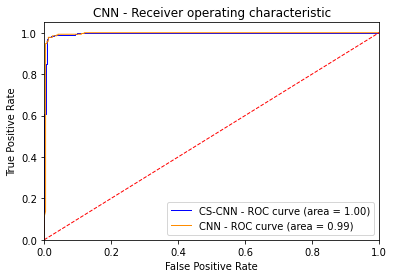

In [73]:

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, prediction_prob)
    roc_auc[i] = auc(fpr[i], tpr[i])


pyplot.figure()
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CS-CNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, prediction_prob1)
    roc_auc[i] = auc(fpr[i], tpr[i])
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CNN - ROC curve (area = %0.2f)' % roc_auc[0])
pyplot.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.show()

In [75]:
m1model = Model(inputs=model.input,outputs=model.get_layer('dense').output)
m2model = Model(inputs=model1.input,outputs=model1.get_layer('dense_10').output)

In [76]:
m1_x_train = m1model.predict(x_train,verbose=1)
m1_x_test = m1model.predict(x_test,verbose=1)

m2_x_train = m2model.predict(x_train,verbose=1)
m2_x_test = m2model.predict(x_test,verbose=1)

16/16 [==============================] - 5s 283ms/step


In [77]:
print("Shape of model1 Train and Test DF : ",m1_x_train.shape," : ",m1_x_test.shape)
print("Shape of model2 Train and Test DF : ",m2_x_train.shape," : ",m2_x_test.shape)

Shape of model1 Train and Test DF :  (1193, 128)  :  (512, 128)
Shape of model2 Train and Test DF :  (1193, 128)  :  (512, 128)


In [78]:
def printMetrics(true,pred):
    print("Accuracy : ",accuracy_score(true, pred))
    print("Precision",precision_score(true, pred , average="weighted"))
    print("Recall : ",recall_score(true, pred , average="weighted"))
    print("F1-score : ",f1_score(true, pred, average="weighted"))
    print("Confusion Matrix : ")
    print(confusion_matrix(true, pred))
    print(classification_report(true,pred))

In [79]:
LR = LogisticRegression()
LR.fit(m1_x_train, y_train)
LRprob = LR.predict_proba(m1_x_test)
y_pred = LR.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

LR = LogisticRegression()
LR.fit(m2_x_train, y_train)
CS_LRprob = LR.predict_proba(m2_x_test)
y_pred = LR.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.978515625
Precision 0.9785272137646807
Recall :  0.978515625
F1-score :  0.9785176788063199
Confusion Matrix : 
[[238   5]
 [  6 263]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.98      0.98      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512

cost-sensitive
Accuracy :  0.982421875
Precision 0.9824257609236303
Recall :  0.982421875
F1-score :  0.9824200594600538
Confusion Matrix : 
[[238   5]
 [  4 265]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.98      0.99      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [80]:
RF = RandomForestClassifier()
RF.fit(m1_x_train, y_train)
RFprob = RF.predict_proba(m1_x_test)
y_pred = RF.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

RF = RandomForestClassifier()
RF.fit(m2_x_train, y_train)
CS_RFprob = RF.predict_proba(m2_x_test)
y_pred = RF.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.984375
Precision 0.9845058150637843
Recall :  0.984375
F1-score :  0.9843802549109532
Confusion Matrix : 
[[241   2]
 [  6 263]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       243
           1       0.99      0.98      0.99       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512

cost-sensitive
Accuracy :  0.982421875
Precision 0.9824257609236303
Recall :  0.982421875
F1-score :  0.9824200594600538
Confusion Matrix : 
[[238   5]
 [  4 265]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.98      0.99      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [81]:
DT = DecisionTreeClassifier()
DT.fit(m1_x_train, y_train)
DTprob = DT.predict_proba(m1_x_test)
y_pred = DT.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

DT = DecisionTreeClassifier()
DT.fit(m2_x_train, y_train)
CS_DTprob = DT.predict_proba(m2_x_test)
y_pred = DT.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.982421875
Precision 0.9824327469338756
Recall :  0.982421875
F1-score :  0.9824235553869891
Confusion Matrix : 
[[239   4]
 [  5 264]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.99      0.98      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512

cost-sensitive
Accuracy :  0.9765625
Precision 0.9765625
Recall :  0.9765625
F1-score :  0.9765625
Confusion Matrix : 
[[237   6]
 [  6 263]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.98      0.98      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [82]:

KNN = KNeighborsClassifier()
KNN.fit(m1_x_train, y_train)
KNNprob = KNN.predict_proba(m1_x_test)
y_pred = KNN.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

KNN = KNeighborsClassifier()
KNN.fit(m2_x_train, y_train)
CS_KNNprob = KNN.predict_proba(m2_x_test)
y_pred = KNN.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.98046875
Precision 0.9806017134863647
Recall :  0.98046875
F1-score :  0.9804753186386914
Confusion Matrix : 
[[240   3]
 [  7 262]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       243
           1       0.99      0.97      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512

cost-sensitive
Accuracy :  0.982421875
Precision 0.9824778837316177
Recall :  0.982421875
F1-score :  0.9824160224193752
Confusion Matrix : 
[[237   6]
 [  3 266]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       243
           1       0.98      0.99      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [83]:

GNB = GaussianNB()
GNB.fit(m1_x_train, y_train)
GNBprob = GNB.predict_proba(m1_x_test)
y_pred = GNB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

GNB = GaussianNB()
GNB.fit(m2_x_train, y_train)
CS_GNBprob = GNB.predict_proba(m2_x_test)
y_pred = GNB.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.982421875
Precision 0.9824987034086741
Recall :  0.982421875
F1-score :  0.9824265111662176
Confusion Matrix : 
[[240   3]
 [  6 263]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       243
           1       0.99      0.98      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512

cost-sensitive
Accuracy :  0.978515625
Precision 0.9786776566237809
Recall :  0.978515625
F1-score :  0.9785028750196223
Confusion Matrix : 
[[235   8]
 [  3 266]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       243
           1       0.97      0.99      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [84]:
AB = AdaBoostClassifier()
AB.fit(m1_x_train, y_train)
ABprob = AB.predict_proba(m1_x_test)
y_pred = AB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

AB = AdaBoostClassifier()
AB.fit(m2_x_train, y_train)
CS_ABprob = AB.predict_proba(m2_x_test)
y_pred = AB.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.98046875
Precision 0.9805058926660553
Recall :  0.98046875
F1-score :  0.9804723341540249
Confusion Matrix : 
[[239   4]
 [  6 263]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.99      0.98      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512

cost-sensitive
Accuracy :  0.98828125
Precision 0.98828125
Recall :  0.98828125
F1-score :  0.98828125
Confusion Matrix : 
[[240   3]
 [  3 266]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       243
           1       0.99      0.99      0.99       269

    accuracy                           0.99       512
   macro avg       0.99      0.99      0.99       512
weighted avg       0.99      0.99      0.99       512



In [85]:
LSVM = svm.SVC(kernel='linear',probability=True)
LSVM.fit(m1_x_train, y_train)
LSVMprob = LSVM.predict_proba(m1_x_test)
y_pred = LSVM.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

LSVM = svm.SVC(kernel='linear',probability=True)
LSVM.fit(m2_x_train, y_train)
CS_LSVMprob = LSVM.predict_proba(m2_x_test)
y_pred = LSVM.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.978515625
Precision 0.9785272137646807
Recall :  0.978515625
F1-score :  0.9785176788063199
Confusion Matrix : 
[[238   5]
 [  6 263]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.98      0.98      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512

cost-sensitive
Accuracy :  0.982421875
Precision 0.9824257609236303
Recall :  0.982421875
F1-score :  0.9824200594600538
Confusion Matrix : 
[[238   5]
 [  4 265]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.98      0.99      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [86]:
RSVM = svm.SVC(kernel='rbf',probability=True)
RSVM.fit(m1_x_train, y_train)
RSVMprob = RSVM.predict_proba(m1_x_test)
y_pred = RSVM.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

RSVM = svm.SVC(kernel='linear',probability=True)
RSVM.fit(m2_x_train, y_train)
CS_RSVMprob = RSVM.predict_proba(m2_x_test)
y_pred = RSVM.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.982421875
Precision 0.9824987034086741
Recall :  0.982421875
F1-score :  0.9824265111662176
Confusion Matrix : 
[[240   3]
 [  6 263]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       243
           1       0.99      0.98      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512

cost-sensitive
Accuracy :  0.982421875
Precision 0.9824257609236303
Recall :  0.982421875
F1-score :  0.9824200594600538
Confusion Matrix : 
[[238   5]
 [  4 265]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.98      0.99      0.98       269

    accuracy                           0.98       512
   macro avg       0.98      0.98      0.98       512
weighted avg       0.98      0.98      0.98       512



In [87]:
SMALL_SIZE = 12
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

pyplot.rc('font', size=SMALL_SIZE)          # controls default text sizes
pyplot.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
pyplot.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
pyplot.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pyplot.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pyplot.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
pyplot.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

def rocinfo(pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, pred)
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr,tpr,roc_auc

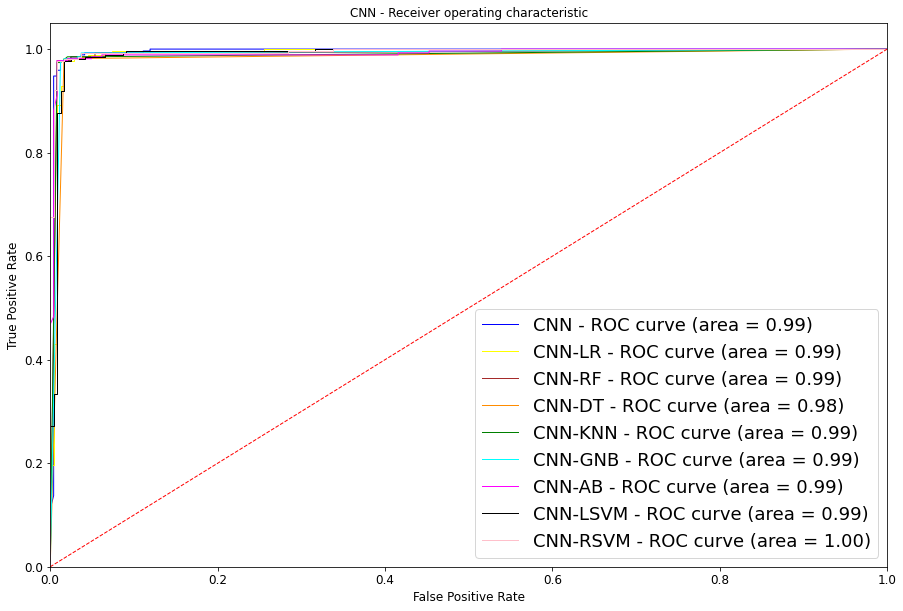

In [88]:
pyplot.figure(figsize=(15,10))

fpr,tpr,roc_auc = rocinfo(prediction_prob1) 
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(LRprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='yellow', lw=1, label='CNN-LR - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(RFprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='brown', lw=1, label='CNN-RF - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(DTprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CNN-DT - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(KNNprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='green', lw=1, label='CNN-KNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(GNBprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='cyan', lw=1, label='CNN-GNB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(ABprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='magenta', lw=1, label='CNN-AB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(LSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='black', lw=1, label='CNN-LSVM - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(RSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='pink', lw=1, label='CNN-RSVM - ROC curve (area = %0.2f)' % roc_auc[0])

pyplot.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.show()

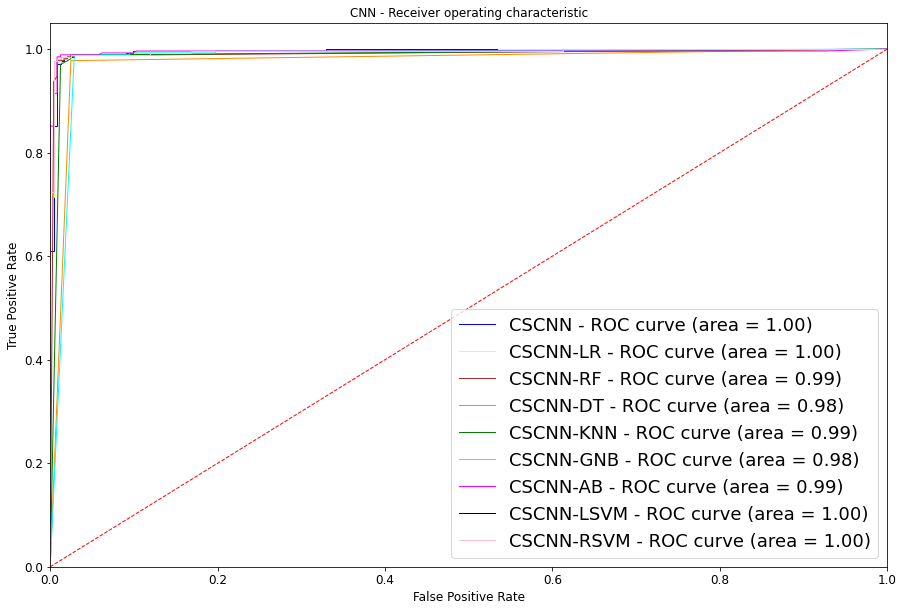

In [89]:
pyplot.figure(figsize=(15,10))

fpr,tpr,roc_auc = rocinfo(prediction_prob) 
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CSCNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_LRprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='yellow', lw=1, label='CSCNN-LR - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_RFprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='brown', lw=1, label='CSCNN-RF - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_DTprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CSCNN-DT - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_KNNprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='green', lw=1, label='CSCNN-KNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_GNBprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='cyan', lw=1, label='CSCNN-GNB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_ABprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='magenta', lw=1, label='CSCNN-AB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_LSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='black', lw=1, label='CSCNN-LSVM - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_RSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='pink', lw=1, label='CSCNN-RSVM - ROC curve (area = %0.2f)' % roc_auc[0])

pyplot.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.show()